# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 656:
Image - Min Value: 7 Max Value: 253
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane

Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 948:
Image - Min Value: 0 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 3 Name: cat

Stats of batch 4:
Samples: 10000
Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Example of Image 236:
Image - Min Value: 0 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile

St

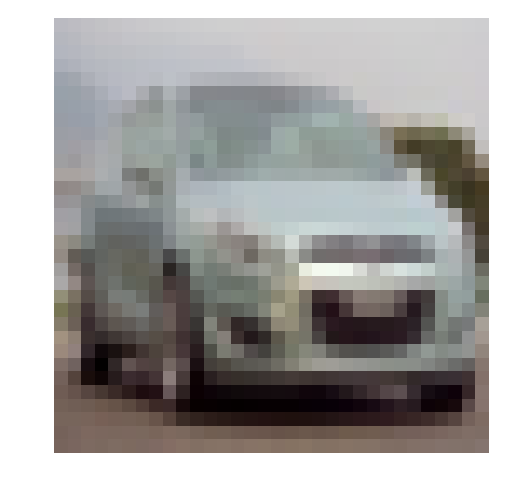

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np
import random


# Explore the dataset
for _ in range(10):
    batch_id = random.randrange(1,5,1)
    sample_id = random.randrange(1,1000,1)
    helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [21]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x=x/255
    x = x.reshape(-1,32,32,3)
    
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [45]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    import sklearn.preprocessing
    #print(x)
    label_binarizer = sklearn.preprocessing.LabelBinarizer()
    label_binarizer.fit(range(10))
    b = label_binarizer.transform(x)
    #print('{}'.format(b))
    return b


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [46]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [14]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    image_height = image_shape[0]
    image_width = image_shape[1]
    color_channels = image_shape[2]
    imagetensor = tf.placeholder(tf.float32, shape=[None, image_height, image_width, color_channels],name='x')
    return imagetensor


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    labelstensor = tf.placeholder(tf.float32, shape=[None,n_classes], name='y')
    return labelstensor


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    keeptensor = tf.placeholder(tf.float32,name='keep_prob')
    return keeptensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [15]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #print("x_tensor: {} \nconv_num_outputs: {} \nconv_ksize: {} \nconv_strides: {}" .format(x_tensor, conv_num_outputs, conv_ksize, conv_strides))
    #print("pool_ksize: {} \npool_strides: {}" .format(pool_ksize, pool_strides))
   
    # Naming conventions
    filter_size_height = conv_ksize[0]
    filter_size_width = conv_ksize[1]
    color_channels = int(x_tensor.shape[3])
    k_output = conv_num_outputs
    stride = [1,conv_strides[0],conv_strides[1],1]
    
    #creating weight
    weight = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
    
    #creating bias
    bias = tf.Variable(tf.zeros(k_output))
    
    # Apply Convolution
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=stride, padding='SAME')
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)
    
    # max pooling
    ksize = [1, pool_ksize[0], pool_ksize[1], 1]
    stride = [1, pool_strides[0], pool_strides[1], 1]
    padding = 'SAME'
    pool_layer = tf.nn.max_pool(conv_layer, ksize, stride, padding)
    
    return pool_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [123]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    import numpy as np
    #print(x_tensor)

    shape = x_tensor.get_shape().as_list()        # a list: [None, height, width, channels]
    dim = np.prod(shape[1:])            # dim = prod(height,width,channels) 
    flattened_tensor = tf.reshape(x_tensor, [-1, dim])           # -1 means "all"
    #print(flattened_tensor)
    return flattened_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [124]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    x_tensor = tf.contrib.layers.fully_connected(inputs=x_tensor, num_outputs=num_outputs, activation_fn=tf.nn.relu)
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [374]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    tensor = tf.contrib.layers.fully_connected(inputs=x_tensor, num_outputs=num_outputs, activation_fn=None)
    return tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [126]:
import tflearn

In [334]:
def conv_net(x, keep_prob,nconv=45, nfullyconn=45):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    #layer_norm = tflearn.layers.normalization.batch_normalization (x,  name='BatchNormalization')
    #layer_conv = conv2d_maxpool(x, 45, (16,16), (2,2), (16,16), (2,2))
    #layer_conv = tf.nn.dropout(layer_conv, keep_prob)
    #layer_conv = conv2d_maxpool(x, 20, (4,4), (2,2), (8,8), (1,1))
    #layer_conv = tf.nn.dropout(layer_conv, keep_prob)
    layer_conv = conv2d_maxpool(x, nconv, (2,2), (4,4), (2,2), (2,2))
    #print("Convolution Network Outputs: {}".format(layer_conv.shape[3]))
    layer_conv = tf.nn.dropout(layer_conv, keep_prob)
    layer_norm = tflearn.layers.normalization.batch_normalization (layer_conv,  name='BatchNormalization')
    #layer_conv = conv2d_maxpool(x, 10, (10,10), (5,5), (10,10), (2,2))
    #layer_conv = tf.nn.dropout(layer_conv, keep_prob)
    #print(layer_conv)
    

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    layer_flat = flatten(layer_norm)
    #layer_flat = tflearn.layers.normalization.batch_normalization (layer_flat,  name='BatchNormalization')
    
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    layer_fully_conn = fully_conn(layer_flat, nfullyconn)
    #print("Fully Connected Outputs: {}".format(layer_fully_conn.shape[1]))
    #layer_fully_conn = fully_conn(layer_flat, 35)
    #layer_fully_conn = tf.nn.dropout(layer_fully_conn, keep_prob)
    layer_fully_conn = fully_conn(layer_fully_conn, 20)
    layer_fully_conn = tf.nn.dropout(layer_fully_conn, keep_prob)
    #layer_fully_conn = fully_conn(layer_fully_conn, 12)
    #layer_fully_conn = tf.nn.dropout(layer_fully_conn, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    layer_final = output(layer_fully_conn, 10)
    
    
    # TODO: return output
    return layer_final


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
def build_network(nconv, nfullyconn):
    tf.reset_default_graph()

    # Inputs
    x = neural_net_image_input((32, 32, 3))
    y = neural_net_label_input(10)
    keep_prob = neural_net_keep_prob_input()

    # Model
    logits = conv_net(x, keep_prob,nconv, nfullyconn)

    # Name logits Tensor, so that is can be loaded from disk after training
    logits = tf.identity(logits, name='logits')

    # Loss and Optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    return x, y, keep_prob, cost, optimizer, accuracy

tests.test_conv_net(conv_net)


Neural Network Built!


In [335]:
build_network(60,70)

(<tf.Tensor 'x:0' shape=(?, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'y:0' shape=(?, 10) dtype=float32>,
 <tf.Tensor 'keep_prob:0' shape=<unknown> dtype=float32>,
 <tf.Tensor 'Mean:0' shape=() dtype=float32>,
 <tf.Operation 'Adam' type=NoOp>,
 <tf.Tensor 'accuracy:0' shape=() dtype=float32>)

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [336]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch, x, y, keep_prob):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_train_nn(train_neural_network)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [337]:
def print_stats(session, feature_batch, label_batch, cost, accuracy, x, y, keep_prob):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    result_cost = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob: 1.0})
    result_accuracy = session.run(accuracy, feed_dict={x:valid_features, y:valid_labels, keep_prob: 1.0})
    print("Cost: {0:.2f}     Accuracy: {1:.2f}%" .format(result_cost,result_accuracy*100))
    return result_cost, result_accuracy

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [348]:
# TODO: Tune Parameters
epochs = 50
batch_size = 256
keep_probability = 0.8

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [349]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
def train_network(nconv=45, nfullyconn=45):
    from time import time
    x, y, keep_prob, cost, optimizer, accuracy = build_network(nconv, nfullyconn)
    
    #print('Checking the Training on a Single Batch...')
    with tf.Session() as sess:
        # Initializing the variables
        sess.run(tf.global_variables_initializer())
        start_time = time()
        project_start = start_time
        # Training cycle
        for epoch in range(epochs):
            batch_i = 1
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels, x, y, keep_prob)
            '''
            if epoch == 0 or (epoch+1)%25 == 0:
                print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
                print_stats(sess, batch_features, batch_labels, cost, accuracy, x, y, keep_prob)
                print("Time lapse: {:.2f} minute(s)." .format((time() - start_time)/60))
                start_time = time()
            '''
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        result_cost, result_accuracy = print_stats(sess, batch_features, batch_labels, cost, accuracy, x, y, keep_prob)
        total_times = (time() - project_start)/60
        print("Total Time Lapse: {:.2f} minute(s)." .format(total_times))
        
    return  result_accuracy, total_times
print('Done')

Done


The follow is code to automate the hyperparameter selection process. The number of outputs for the conv layer and fully connected layer are selected using an alternating gaussian regression estimation process. On top of the the keep probability is selected using the more systematic grid search approach. 

credit for this section goes to: http://neupy.com/2016/12/17/hyperparameter_optimization_for_neural_networks.html

In [351]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess

def vector_2d(array):
    return np.array(array).reshape((-1, 1))

def gaussian_process(x_train, y_train, x_test):
    import warnings
    def fxn():
        warnings.warn("deprecated", DeprecationWarning)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fxn()
        x_train = vector_2d(x_train)
        y_train = vector_2d(y_train)
        x_test = vector_2d(x_test)
        #print(x_train)
        #print(y_train)
        #print(x_test)

        # Train gaussian process
        gp = GaussianProcess(corr='squared_exponential',
                             theta0=1e-1, thetaL=1e-3, thetaU=1)
        gp.fit(x_train, y_train)

        # Get mean and standard deviation for each possible
        # number of hidden units
        y_mean, y_var = gp.predict(x_test, eval_MSE=True)
        y_std = np.sqrt(vector_2d(y_var))

    return y_mean, y_std

def next_parameter_by_ei(y_max, y_mean, y_std, x_choices):
    # Calculate expecte improvement from 95% confidence interval
    y_highestexpected = (y_mean + 1.96 * y_std)
    expected_improvement = y_highestexpected - y_max
    expected_improvement[expected_improvement < 0] = 0

    max_index = expected_improvement.argmax()
    # Select next choice
    next_parameter = x_choices[max_index]

    return next_parameter

In [352]:
def plot_gp_bounds(x, y, x_predict, y_predict, y_std, ax=None):
    if ax is None:
        ax = plt.gca()
        
    bound1 = y_predict + 1.96 * y_std
    bound2 = y_predict - 1.96 * y_std

    ax.plot(x_predict, y_predict, color=colors[1])
    ax.plot(x_predict, bound1, color=colors[1])
    ax.plot(x_predict, bound2, color=colors[1])
    
    ax.fill_between(
        x_predict,
        bound1.reshape(len(bound1)),
        bound2.reshape(len(bound2)),
        alpha=0.3
    )
    ax.scatter(x, y, color=colors[1], s=50)
    
    return ax

import os

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))

def saveas(name):
    image_name = '{}.png'.format(name)
    image_path = os.path.join(CURRENT_DIR, image_name)
    plt.savefig(image_path, facecolor='#f8fafb', bbox_inches='tight')

In [367]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.color_cycle']

def hyperparam_selection(func, param, stat,n_hidden_range, func_args=None, n_iter=20):
    if func_args is None:
        func_args = []

    scores = []
    parameters = []

    min_n_hidden, max_n_hidden = n_hidden_range
    n_hidden_choices = np.arange(min_n_hidden, max_n_hidden + 1)
    n_hidden = random.randint(min_n_hidden, max_n_hidden)
    if param == 'nconv':
        nconv = n_hidden
        nfullyconn = stat
    else:
        nconv = stat
        nfullyconn = n_hidden    

    # To be able to perform gaussian process we need to
    # have at least 2 samples.

    #print("Iteration: 1")
    acc,t = func(nconv=nconv, nfullyconn=nfullyconn, *func_args)
    score = acc*100-t

    parameters.append(n_hidden)
    scores.append(score)

    n_hidden = random.randint(min_n_hidden, max_n_hidden)

    for iteration in range(2, n_iter + 1):
        #print("\nIteration: {}" .format(iteration))
        n_hidden = int(n_hidden)
        if param == 'nconv':
            nconv = n_hidden
            nfullyconn = stat
        else:
            nconv = stat
            nfullyconn = n_hidden 
        acc,t = func(nconv=nconv, nfullyconn=nfullyconn, *func_args)
        score = acc*100-t
        
        parameters.append(n_hidden)
        scores.append(score)
        
        x_train = vector_2d(parameters)
        y_train = vector_2d(scores)
        x_test = vector_2d(n_hidden_choices)


        #y_min = max(scores)
        y_mean, y_std = gaussian_process(parameters, scores,
                                         n_hidden_choices)

        #n_hidden = next_parameter_by_ei(y_min, y_mean, y_std,
                                        #n_hidden_choices)
        #########
        # Calculate expecte improvement from 95% confidence interval
        #expected_improvement = y_min - (y_mean - 1.96 * y_std)
        #expected_improvement[expected_improvement < 0] = 0

        #max_index = expected_improvement.argmax()
        # Select next choice based on expected improvement
        #n_hidden = n_hidden_choices[max_index]
        
        y_max = max(scores)
        y_highestexpected = (y_mean + 1.96 * y_std)
        expected_improvement = y_highestexpected - y_max
        expected_improvement[expected_improvement < 0] = 0
        max_index = expected_improvement.argmax()
        # Select next choice
        n_hidden = n_hidden_choices[max_index]
        
        # Build plots
        ax1 = plt.subplot2grid((n_iter, 2), (iteration - 1, 0))
        ax2 = plt.subplot2grid((n_iter, 2), (iteration - 1, 1))
        
        order = np.argsort(parameters)

        plot_gp_bounds(x_train, y_train, n_hidden_choices, y_mean, y_std, ax1)
        ax1.scatter(parameters[-1], scores[-1], marker='*', s=150,
                    color=colors[0], zorder=10, label='Last step')
        ax1.set_title("Gaussian Process\nafter {} iterations".format(iteration))
        ax1.set_xlim(min_n_hidden - 10, max_n_hidden + 10)
        ax1.set_xlabel("Number of outputs")
        ax1.set_ylabel("Score: Accuracy(%)-Time(min)\n(the larger the better)")
        ax1.legend(loc='upper right')
        
        ax2.plot(n_hidden_choices, expected_improvement)
        ax2.scatter(n_hidden_choices[max_index], expected_improvement[max_index],
                    marker='*', s=150, color=colors[1], label='Next step', zorder=10)
        ax2.set_xlim(min_n_hidden - 10, max_n_hidden + 10)
        ax2.set_title("Expected Improvement\nafter {} iterations".format(iteration))
        ax2.set_xlabel("Number of outputs for {} layer".format(param))
        
        if n_hidden > 450:
            ax2.legend(loc='upper left')
        else:
            ax2.legend(loc='upper right')
        ########

        if y_max == 100 or n_hidden in parameters:
            # Lowest expected improvement value have been achieved
            break

    max_score_index = np.argmax(scores)
    #for i in range(len(scores)):
        #print("Parameter: {} Score: {}" .format(parameters[i],scores[i]))
    return parameters[max_score_index], round(scores[max_score_index],2)

C:\Users\KRapes\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Start
Keep Probability: 0.5
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.59     Accuracy: 40.98%
Total Time Lapse: 1.17 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.36     Accuracy: 43.62%
Total Time Lapse: 1.37 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.02     Accuracy: 47.00%
Total Time Lapse: 1.41 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.39     Accuracy: 44.64%
Total Time Lapse: 1.47 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.41     Accuracy: 41.44%
Total Time Lapse: 1.04 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.22     Accuracy: 44.66%
Total Time Lapse: 1.10 minute(s).


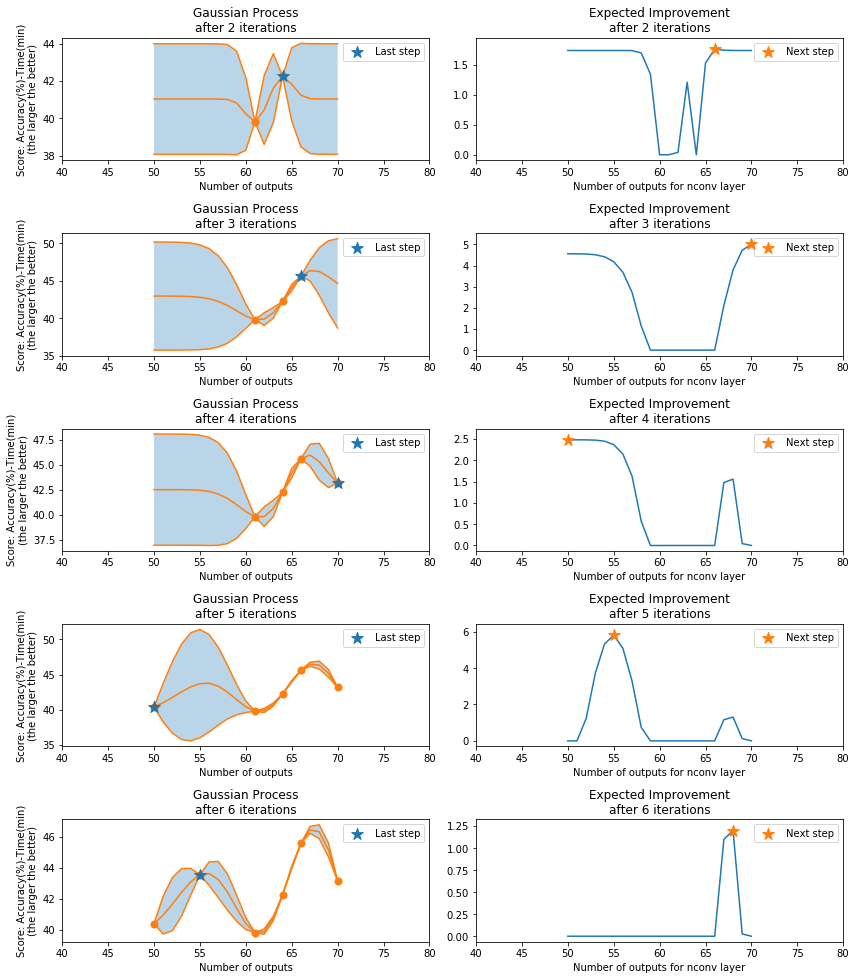


45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.96     Accuracy: 33.72%
Total Time Lapse: 1.67 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.78%
Total Time Lapse: 1.64 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 10.50%
Total Time Lapse: 1.65 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 10.50%
Total Time Lapse: 1.57 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.78%
Total Time Lapse: 1.67 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.23     Accuracy: 45.08%
Total Time Lapse: 1.56 minute(s).


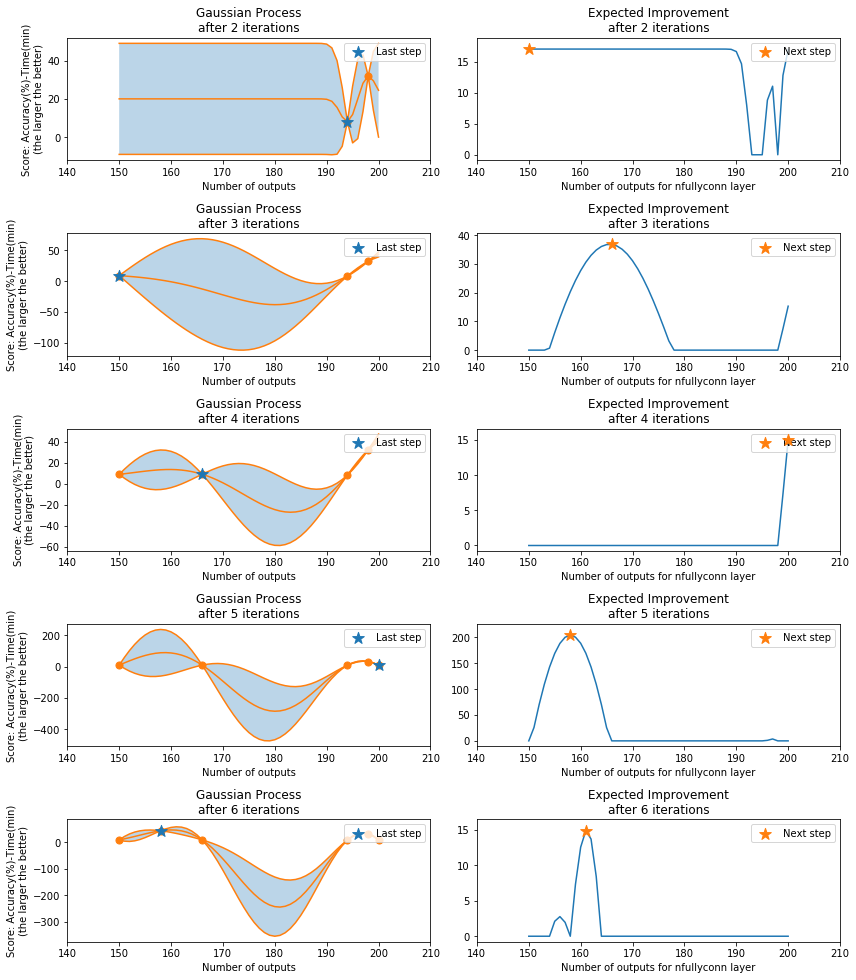


43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.78%
Total Time Lapse: 1.34 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.01     Accuracy: 47.64%
Total Time Lapse: 1.16 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.04     Accuracy: 47.04%
Total Time Lapse: 1.14 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.98%
Total Time Lapse: 1.54 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.40     Accuracy: 42.76%
Total Time Lapse: 1.17 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.53     Accuracy: 39.50%
Total Time Lapse: 1.18 minute(s).


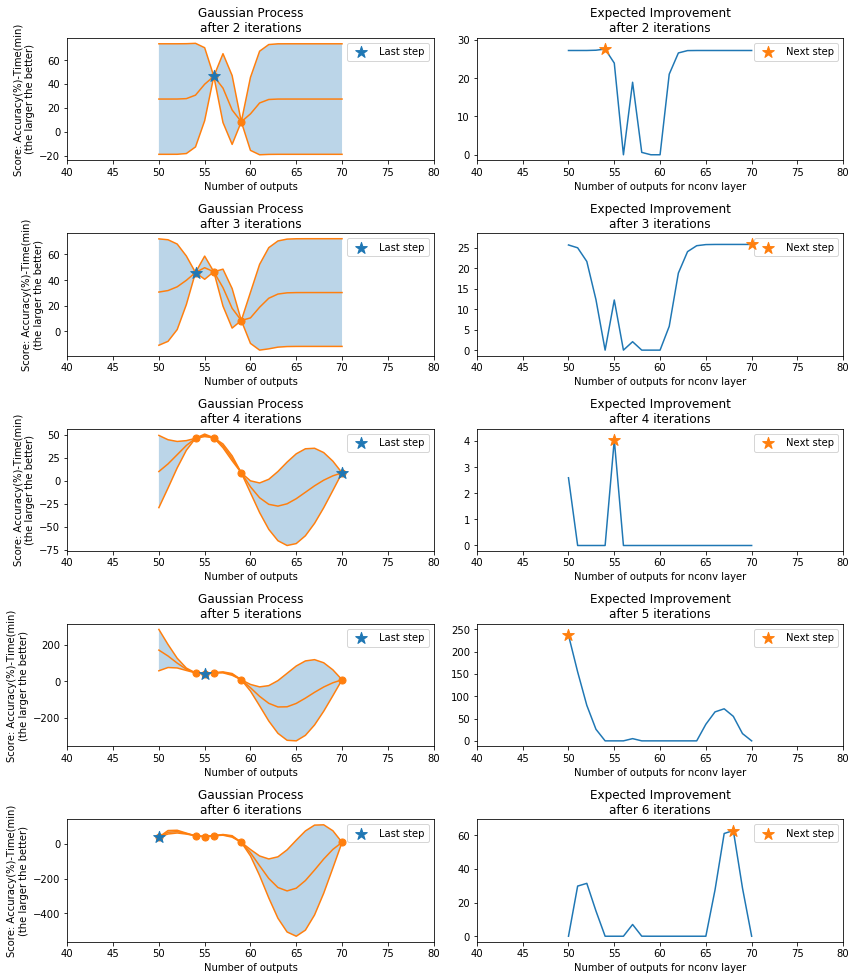


43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
Keep Probability: 0.6
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.96     Accuracy: 45.66%
Total Time Lapse: 1.18 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.89     Accuracy: 48.66%
Total Time Lapse: 1.58 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.91     Accuracy: 48.42%
Total Time Lapse: 1.26 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.17     Accuracy: 45.16%
Total Time Lapse: 1.41 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.12     Accuracy: 45.82%
Total Time Lapse: 1.15 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.04     Accuracy: 46.60%
Total Time Lapse: 1.04 minute(s).


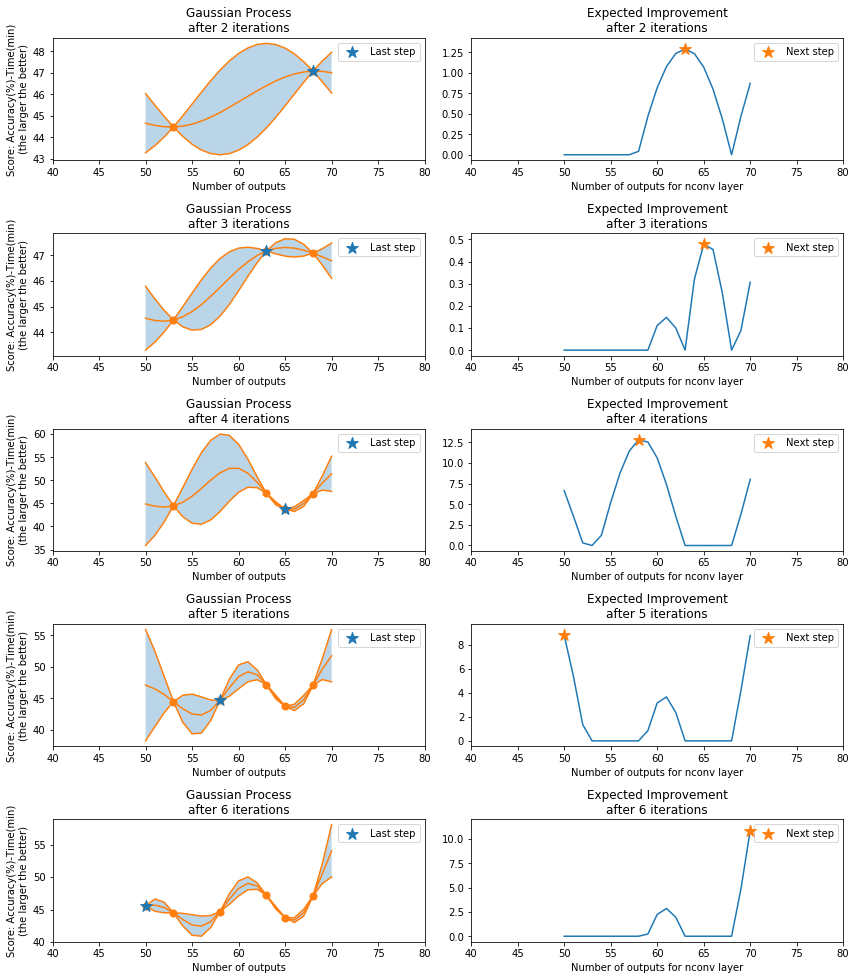


43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.70     Accuracy: 48.90%
Total Time Lapse: 1.29 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.78%
Total Time Lapse: 1.32 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.29     Accuracy: 43.54%
Total Time Lapse: 1.28 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.58     Accuracy: 37.74%
Total Time Lapse: 1.37 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.78%
Total Time Lapse: 1.31 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.98     Accuracy: 46.86%
Total Time Lapse: 1.33 minute(s).


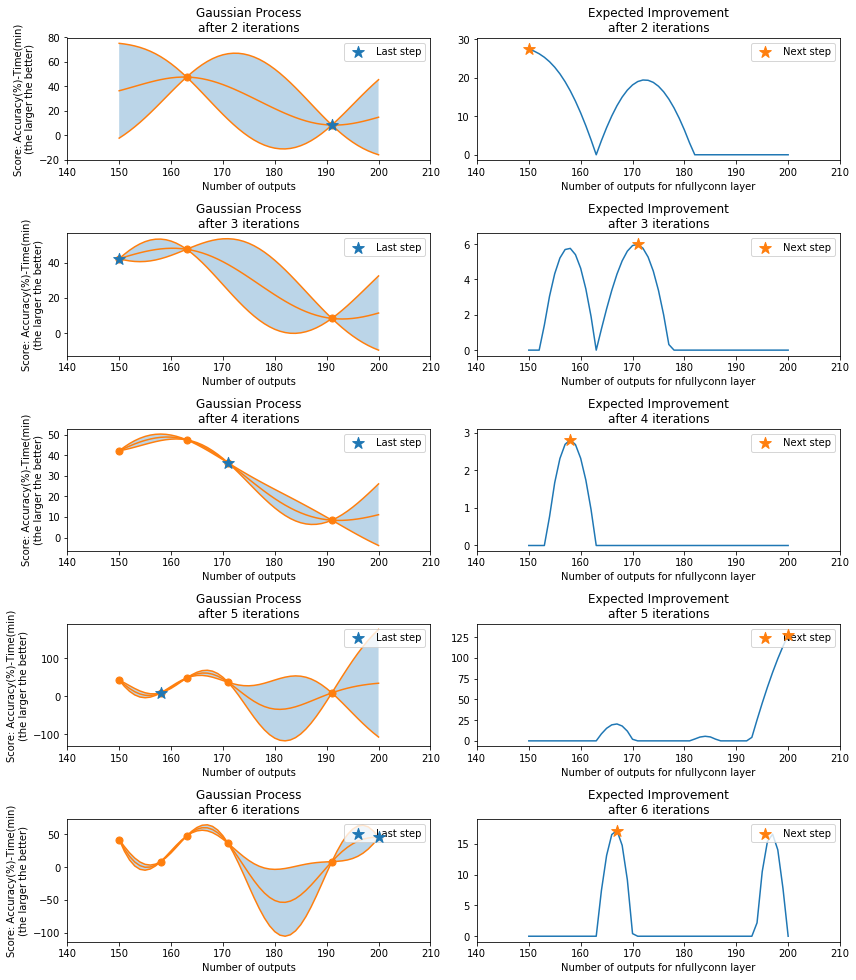


47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.78%
Total Time Lapse: 1.30 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.77     Accuracy: 49.48%
Total Time Lapse: 1.10 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.80     Accuracy: 47.26%
Total Time Lapse: 1.15 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.92     Accuracy: 45.90%
Total Time Lapse: 1.11 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.81     Accuracy: 33.56%
Total Time Lapse: 1.54 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.71     Accuracy: 49.10%
Total Time Lapse: 1.18 minute(s).


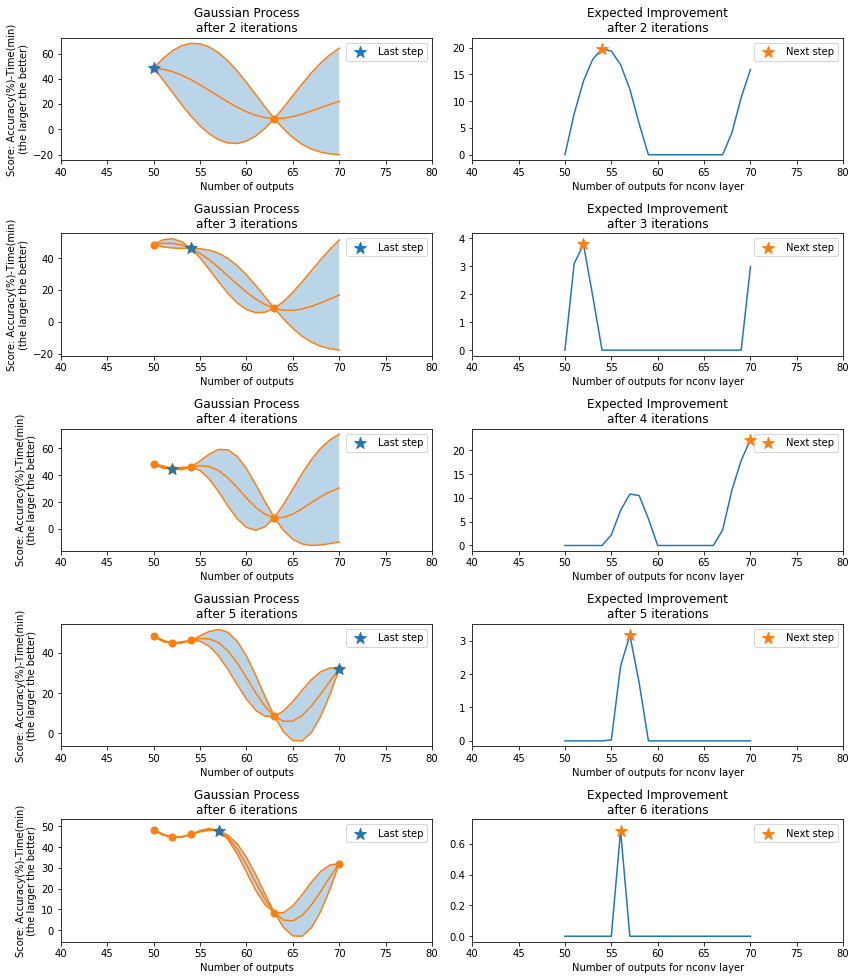


48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Keep Probability: 0.7
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.62     Accuracy: 49.48%
Total Time Lapse: 1.11 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.52     Accuracy: 50.84%
Total Time Lapse: 1.53 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.59     Accuracy: 49.52%
Total Time Lapse: 1.29 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 10.54%
Total Time Lapse: 1.54 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.85     Accuracy: 47.36%
Total Time Lapse: 1.09 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.58     Accuracy: 50.48%
Total Time Lapse: 1.47 minute(s).


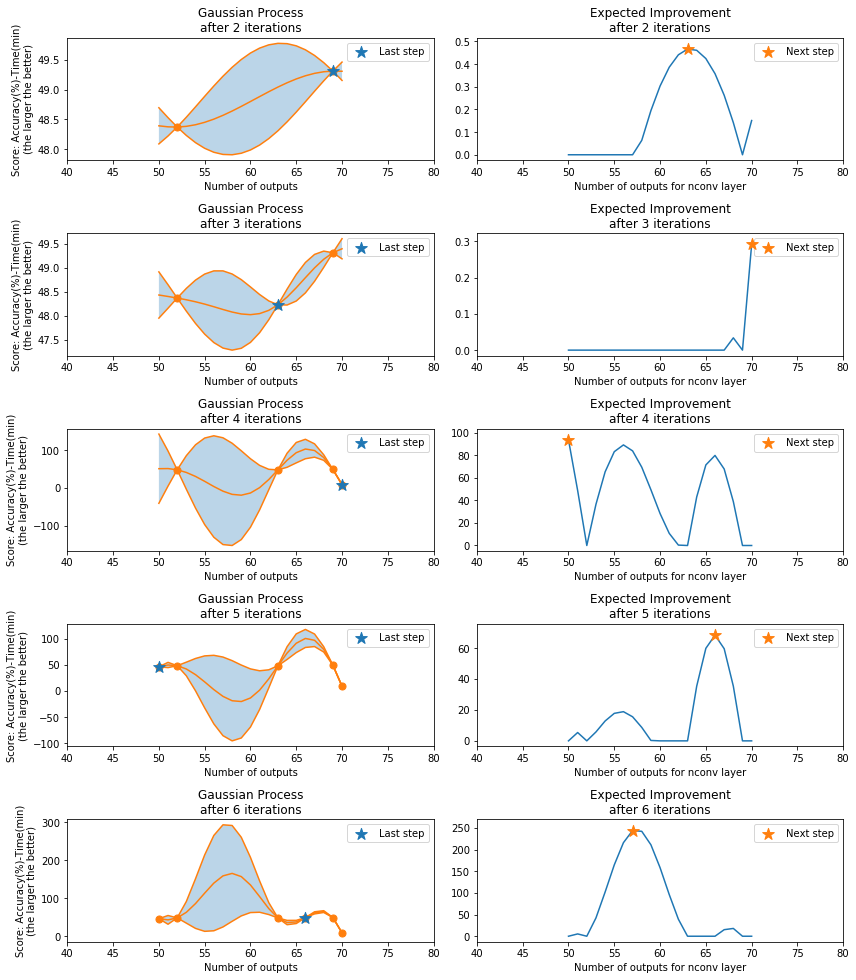


48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.33     Accuracy: 51.32%
Total Time Lapse: 1.52 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.29     Accuracy: 50.92%
Total Time Lapse: 1.52 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.30     Accuracy: 9.98%
Total Time Lapse: 1.54 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.55     Accuracy: 36.50%
Total Time Lapse: 1.56 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.55     Accuracy: 49.44%
Total Time Lapse: 1.52 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.64     Accuracy: 49.84%
Total Time Lapse: 1.51 minute(s).


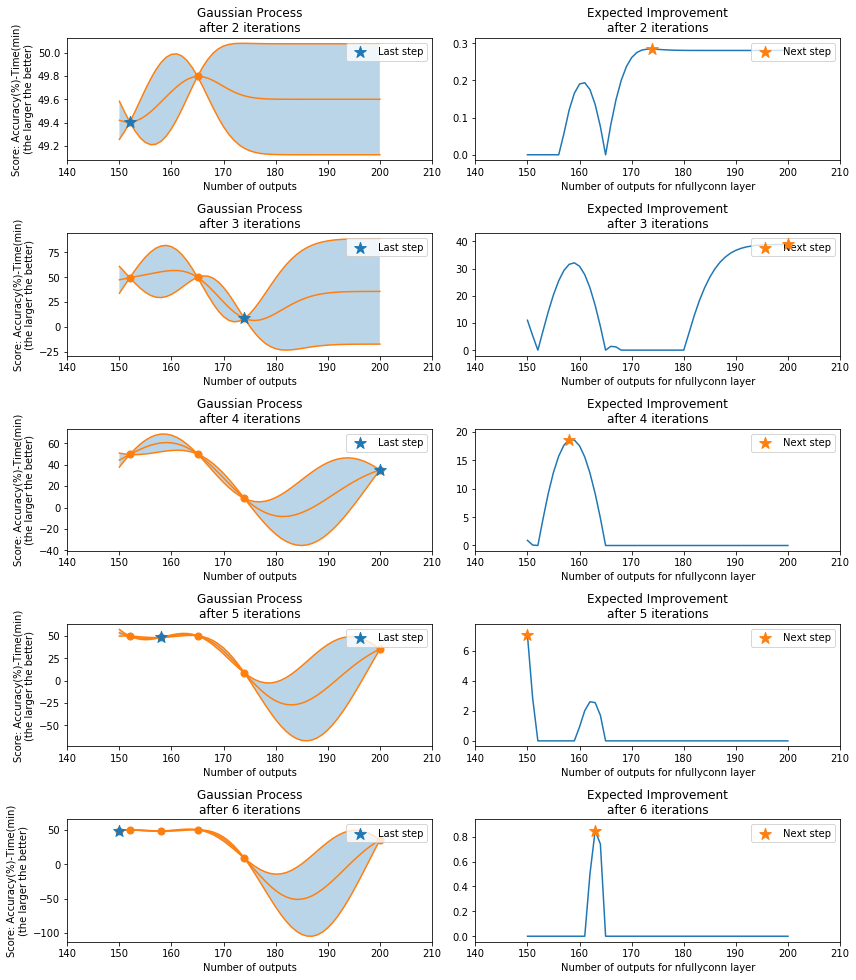


48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 1.01     Accuracy: 47.76%
Total Time Lapse: 1.53 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.66     Accuracy: 49.40%
Total Time Lapse: 1.44 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.37     Accuracy: 51.28%
Total Time Lapse: 1.24 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.72     Accuracy: 50.26%
Total Time Lapse: 1.15 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.68     Accuracy: 49.12%
Total Time Lapse: 1.21 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.60     Accuracy: 50.78%
Total Time

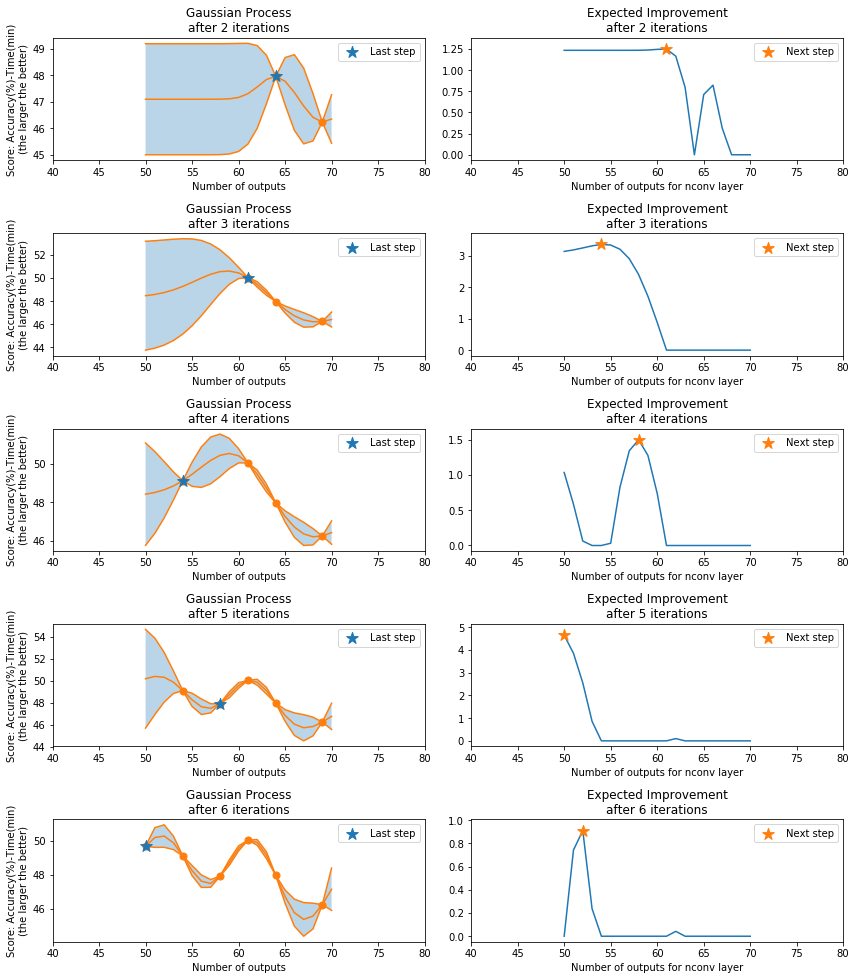


48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Keep Probability: 0.8
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.35     Accuracy: 50.34%
Total Time Lapse: 1.40 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.60     Accuracy: 48.96%
Total Time Lapse: 1.08 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.31     Accuracy: 52.32%
Total Time Lapse: 1.50 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.51     Accuracy: 50.18%
Total Time Lapse: 1.49 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.27     Accuracy: 50.96%
Total Time Lapse: 1.16 min

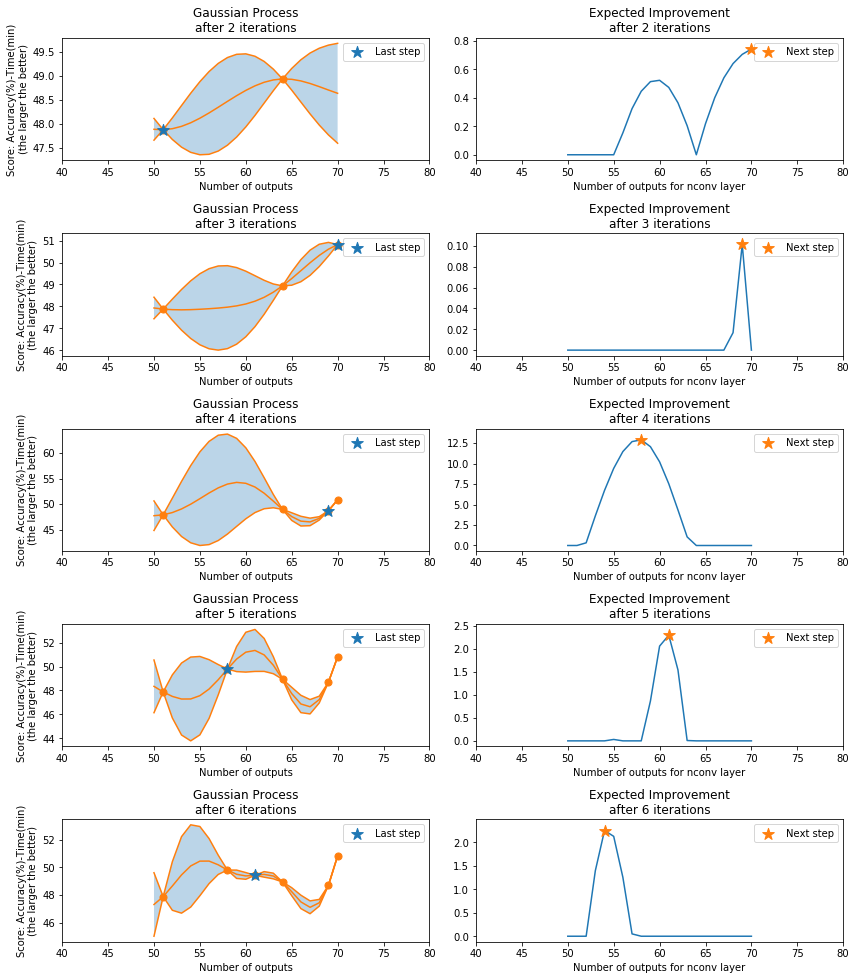


48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
50.82 {'nconv': 70, 'nfullyconn': 123, 'keep_prob': 0.8}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.55     Accuracy: 50.30%
Total Time Lapse: 1.53 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.54     Accuracy: 47.30%
Total Time Lapse: 1.53 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.27     Accuracy: 50.78%
Total Time Lapse: 1.55 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.17     Accuracy: 51.44%
Total Time Lapse: 1.57 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.39     Accuracy

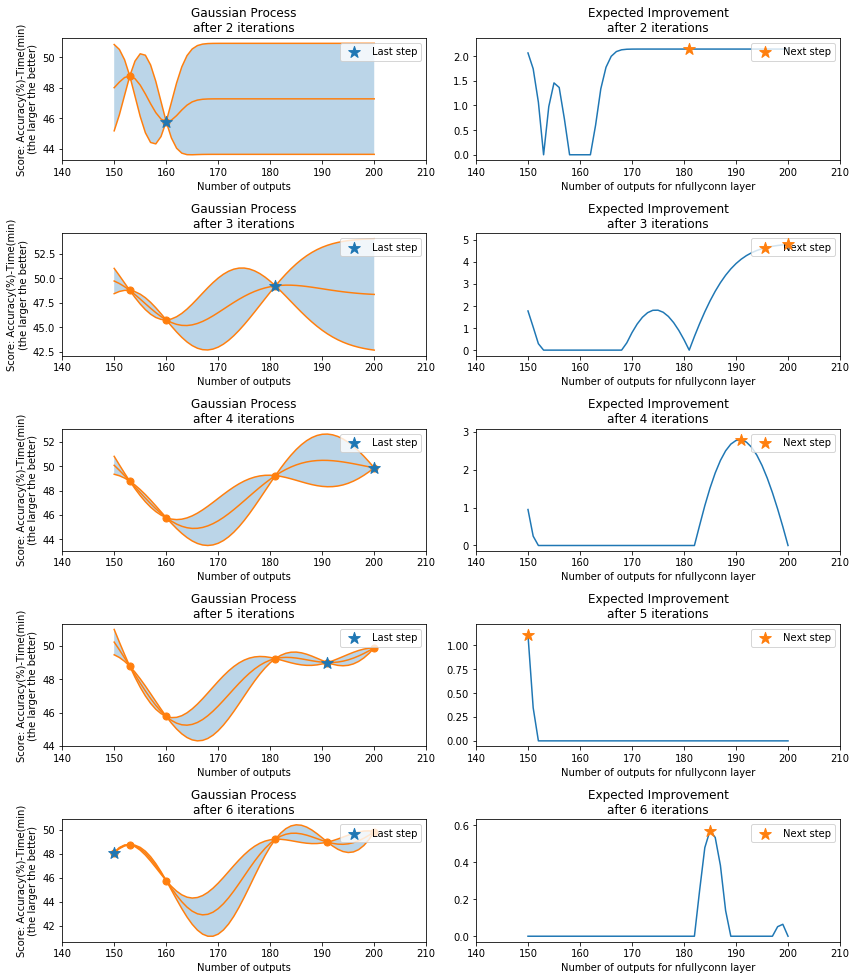


48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
50.82 {'nconv': 70, 'nfullyconn': 123, 'keep_prob': 0.8}
49.87 {'nconv': 70, 'nfullyconn': 200, 'keep_prob': 0.8}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 2.12     Accuracy: 23.60%
Total Time Lapse: 1.50 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.24     Accuracy: 50.50%
Total Time Lapse: 1.25 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.23     Accuracy: 50.62%
Total Time Lapse: 1.18 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.17     Accuracy: 51.12%
Total Time Lapse: 1.14 minute

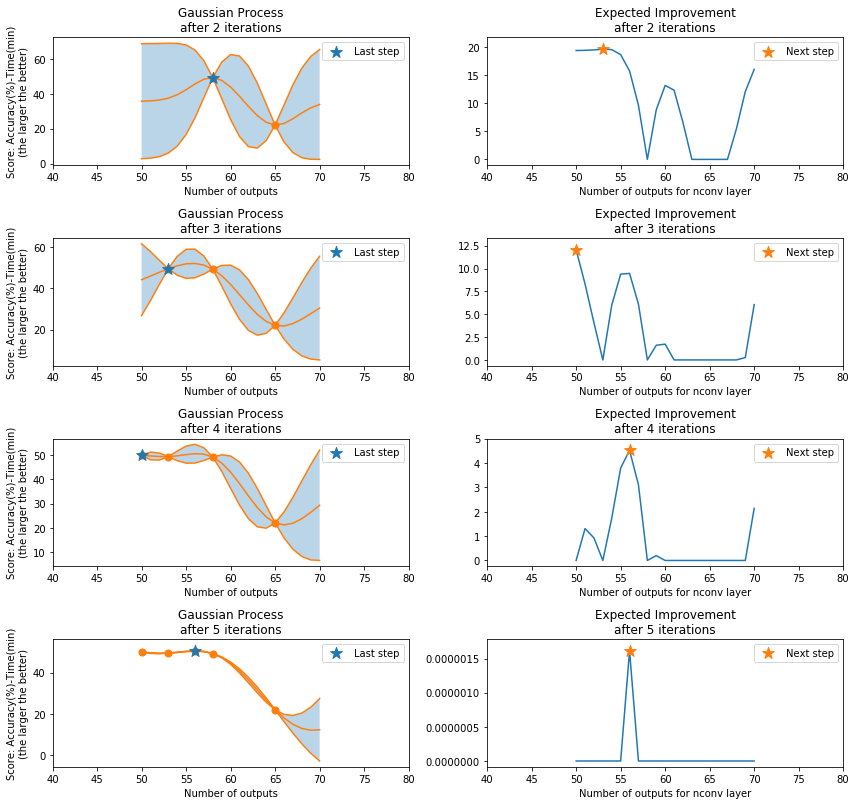


45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
50.46 {'nconv': 56, 'nfullyconn': 200, 'keep_prob': 0.8}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
49.87 {'nconv': 70, 'nfullyconn': 200, 'keep_prob': 0.8}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
50.82 {'nconv': 70, 'nfullyconn': 123, 'keep_prob': 0.8}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Keep Probability: 0.9
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.65     Accuracy: 48.72%
Total Time Lapse: 1.13 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.45     Accuracy: 49.62%
Total Time Lapse: 1.36 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.76     Accuracy: 48.84%
Total Time Lapse: 1.44 minute(s).
Epoch 50, C

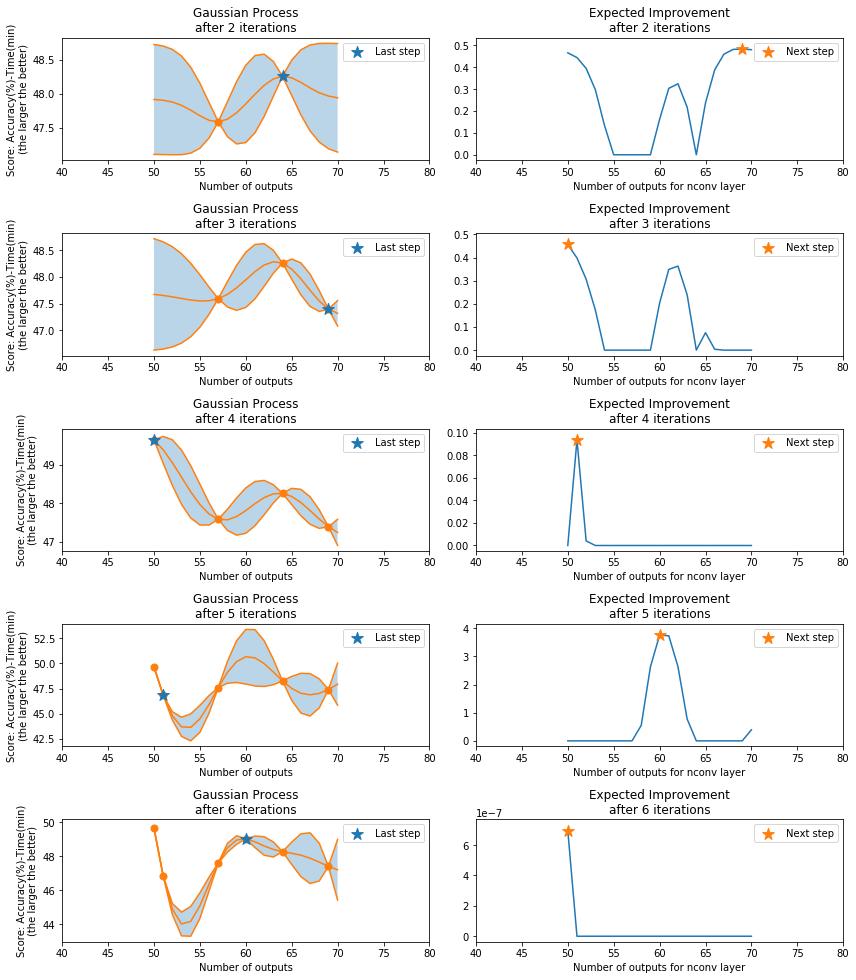


45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
50.46 {'nconv': 56, 'nfullyconn': 200, 'keep_prob': 0.8}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
49.87 {'nconv': 70, 'nfullyconn': 200, 'keep_prob': 0.8}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
50.82 {'nconv': 70, 'nfullyconn': 123, 'keep_prob': 0.8}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
49.64 {'nconv': 50, 'nfullyconn': 65, 'keep_prob': 0.9}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.14     Accuracy: 50.12%
Total Time Lapse: 1.13 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.18     Accuracy: 49.84%
Total Time Lapse: 1.13 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.12     Accuracy: 49.26%
Total Time 

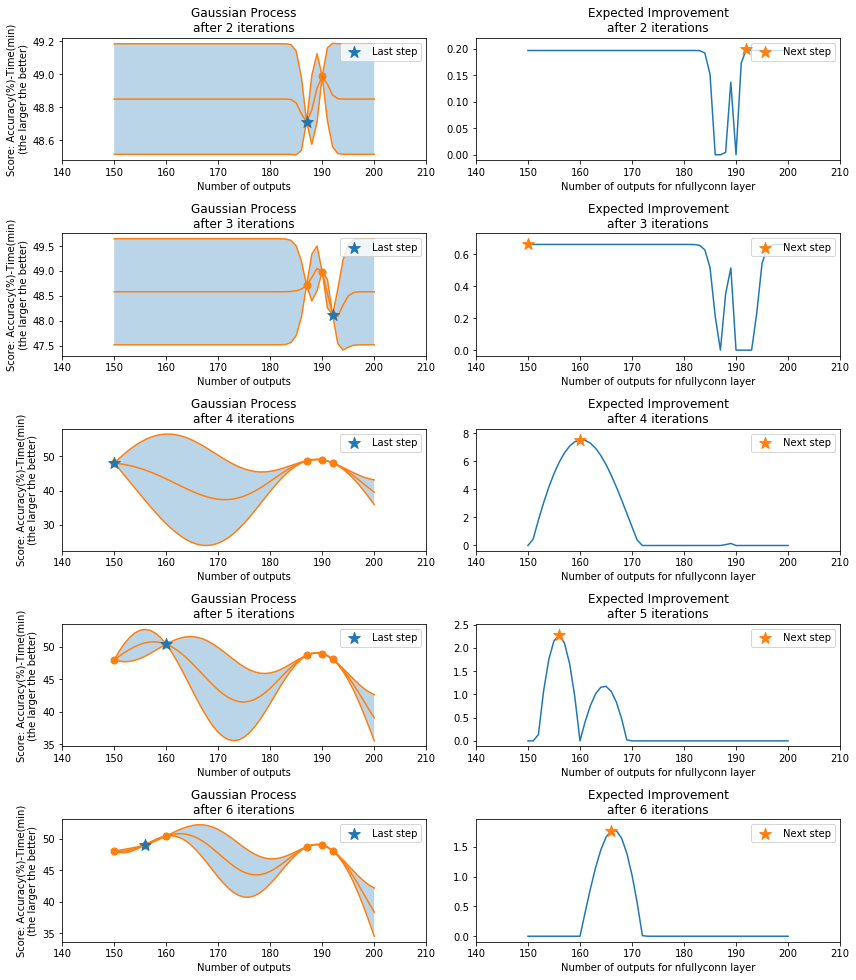


50.43 {'nconv': 50, 'nfullyconn': 160, 'keep_prob': 0.9}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
50.46 {'nconv': 56, 'nfullyconn': 200, 'keep_prob': 0.8}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
49.87 {'nconv': 70, 'nfullyconn': 200, 'keep_prob': 0.8}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
50.82 {'nconv': 70, 'nfullyconn': 123, 'keep_prob': 0.8}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
49.64 {'nconv': 50, 'nfullyconn': 65, 'keep_prob': 0.9}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.35     Accuracy: 49.72%
Total Time Lapse: 1.15 minute(s).
Epoch 50, CIFAR-10 Batch 1:  Cost: 0.26     Accuracy: 49.50%
Total Time Lapse: 1.11 minute(s).
Epoch 50, CIFAR

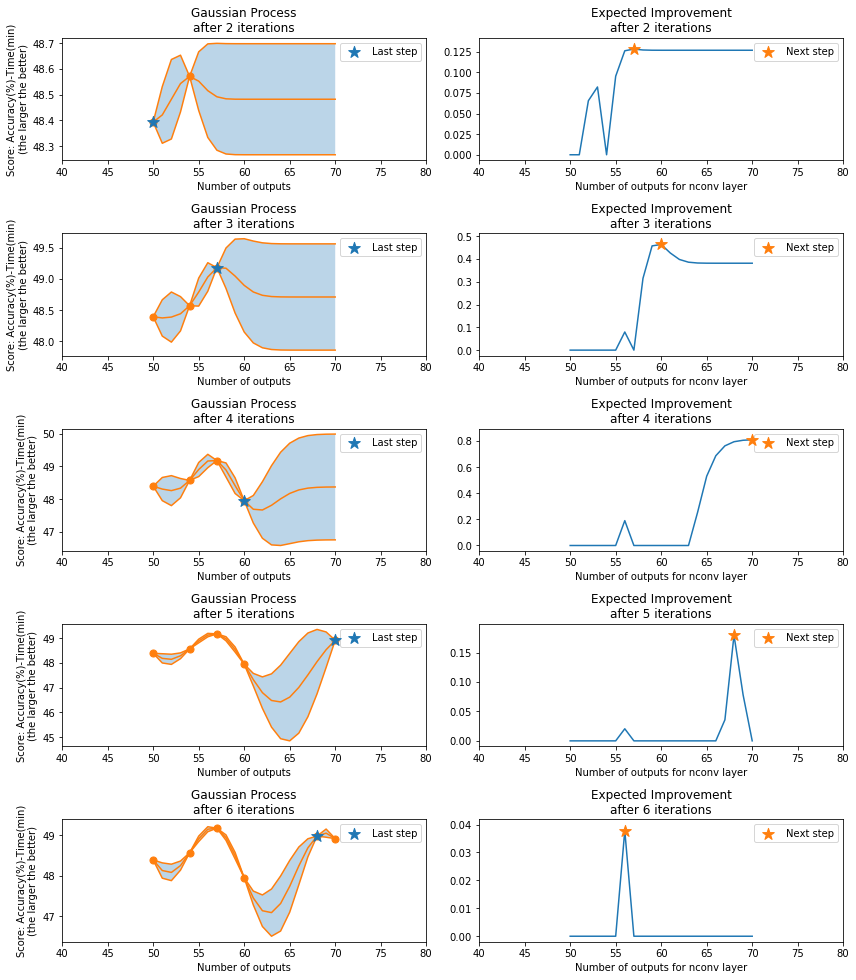


50.43 {'nconv': 50, 'nfullyconn': 160, 'keep_prob': 0.9}
45.59 {'nconv': 66, 'nfullyconn': 83, 'keep_prob': 0.5}
50.46 {'nconv': 56, 'nfullyconn': 200, 'keep_prob': 0.8}
49.8 {'nconv': 69, 'nfullyconn': 165, 'keep_prob': 0.7}
49.87 {'nconv': 70, 'nfullyconn': 200, 'keep_prob': 0.8}
49.18 {'nconv': 57, 'nfullyconn': 160, 'keep_prob': 0.9}
43.52 {'nconv': 66, 'nfullyconn': 158, 'keep_prob': 0.5}
50.82 {'nconv': 70, 'nfullyconn': 123, 'keep_prob': 0.8}
46.48 {'nconv': 56, 'nfullyconn': 158, 'keep_prob': 0.5}
47.16 {'nconv': 63, 'nfullyconn': 99, 'keep_prob': 0.6}
48.38 {'nconv': 50, 'nfullyconn': 163, 'keep_prob': 0.6}
49.31 {'nconv': 69, 'nfullyconn': 164, 'keep_prob': 0.7}
50.04 {'nconv': 61, 'nfullyconn': 165, 'keep_prob': 0.7}
49.64 {'nconv': 50, 'nfullyconn': 65, 'keep_prob': 0.9}
47.61 {'nconv': 63, 'nfullyconn': 163, 'keep_prob': 0.6}


In [368]:
#hyperparam_selection(train_network, (20,100), func_args=None, n_iter=4)
plt.close("all")
best_n_hidden = random.randint(50,170)
lastbest = best_n_hidden
lastparam = 'nfullyconn'
param = ''
print("Start")
findings = {}
for keep_probability in range(5,10,1):
    keep_probability = keep_probability/10.0
    print("Keep Probability: {}".format(keep_probability))
    best_n_hidden = random.randint(50,200)
    lastbest = best_n_hidden
    for iteration in range(3):
        if iteration%2 ==0:
            param = 'nconv'
            notparam = 'nfullyconn'
            param_range = [50,70]
        else:
            param= 'nfullyconn'
            notparam = 'nconv'
            param_range = [150,200]
        fig = plt.figure(figsize=(12, 16))
        best_n_hidden,score = hyperparam_selection(
            train_network,
            param,
            best_n_hidden,
            n_hidden_range=param_range,
            func_args=[],
            n_iter=6,
        )
        plt.tight_layout()
        plt.show()
        print("")
        findings[score] = {param: best_n_hidden, notparam: lastbest, 'keep_prob': keep_probability}
        lastbest = best_n_hidden
        for key in findings:
            print("{} {}".format(key,findings[key]))

nconv = findings[max(findings)]['nconv']
nfullyconn = findings[max(findings)]['nfullyconn']
keep_probability = findings[max(findings)]['keep_prob']

saveas('hyperparam-selection-nn-hidden-units')

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [372]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'
x, y, keep_prob, cost, optimizer, accuracy = build_network(nconv, nfullyconn)
print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels,x, y, keep_prob)
        if epoch == 0 or (epoch+1)%25 == 0:
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy,x, y, keep_prob)
    
    print('\nEpoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
    print_stats(sess, batch_features, batch_labels, cost, accuracy, x, y, keep_prob)
    
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 5:  Cost: 2.19     Accuracy: 15.68%
Epoch 25, CIFAR-10 Batch 5:  Cost: 0.54     Accuracy: 57.06%
Epoch 50, CIFAR-10 Batch 5:  Cost: 0.21     Accuracy: 57.88%

Epoch 50, CIFAR-10 Batch 5:  Cost: 0.21     Accuracy: 57.88%


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.570703125



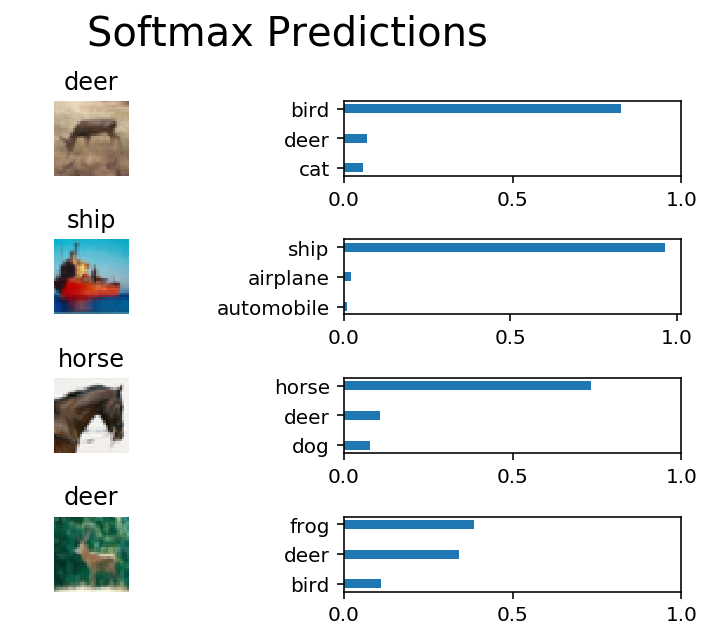

In [373]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.